## (a) 四维数据的iris数据集

In [1]:
import pandas as pd
import numpy as np
from plotnine import *
from sklearn import manifold, datasets


iris = datasets.load_iris()

tsne = manifold.TSNE(n_components=2, init='pca', random_state=501)
X_tsne = tsne.fit_transform(iris.data)
target = pd.Categorical.from_codes(iris.target, iris.target_names)
df = pd.DataFrame(
    dict(DistributedY1=X_tsne[:, 0], DistributedY2=X_tsne[:, 1], target=target))

df


,DistributedY1,DistributedY2,target
0,-25.117199,9.059608,setosa
1,-22.541553,8.045611,setosa
2,-22.436010,9.263760,setosa
3,-22.081423,8.979576,setosa
4,-25.107370,9.551804,setosa
...,...,...,...
145,7.062612,-7.190415,virginica
146,8.492211,-4.248770,virginica
147,7.497847,-6.372992,virginica
148,7.133761,-8.166843,virginica


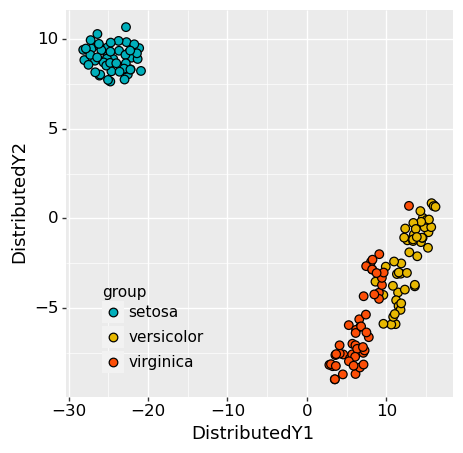

<ggplot: (182368795652)>


In [2]:
base_plot2 = (ggplot(df, aes('DistributedY1', 'DistributedY2', fill='target')) +
              geom_point(alpha=1, size=3, shape='o', colour='k') +
              # 绘制透明度为0.2 的散点图
              # stat_ellipse( geom="polygon", level=0.95, alpha=0.2) +
              # 绘制椭圆标定不同类别，如果省略该语句，则绘制图3-1-7(c)
              # scale_color_manual(values=("#00AFBB","#FC4E07")) +#使用不同颜色标定不同数据类别
              # 使用不同颜色标定不同椭类别
              scale_fill_manual(values=("#00AFBB", "#E7B800", "#FC4E07"), name='group') +
              theme(
    # text=element_text(size=15,face="plain",color="black"),
    axis_title=element_text(size=13, face="plain", color="black"),
    axis_text=element_text(size=12, face="plain", color="black"),
    legend_text=element_text(size=11, face="plain", color="black"),
    legend_background=element_blank(),
    legend_position=(0.3, 0.25),
    aspect_ratio=1,
    figure_size=(5, 5),
    dpi=100
)
)
print(base_plot2)


## (b) 93维数据的train数据集

In [3]:
df = pd.read_csv('Tsne_Data.csv')
df = df.set_index('id')

num_rows_sample = 5000

df = df.sample(n=num_rows_sample)

tsne = manifold.TSNE(n_components=2, init='pca', random_state=501)
X_tsne = tsne.fit_transform(df.iloc[:, :-1])

df = pd.DataFrame(dict(
    DistributedY1=X_tsne[:, 0], DistributedY2=X_tsne[:, 1], target=df.iloc[:, -1]))
df


,DistributedY1,DistributedY2,target
id,,,
11871,-28.675140,27.469158,Class_2
52579,39.476353,6.181512,Class_8
781,22.675184,4.028324,Class_1
18369,-66.451782,18.294338,Class_3
3369,-52.645214,28.745630,Class_2
...,...,...,...
46877,34.707230,-3.870767,Class_7
31940,-2.944126,-68.460983,Class_6
17952,-48.964989,-47.494438,Class_2


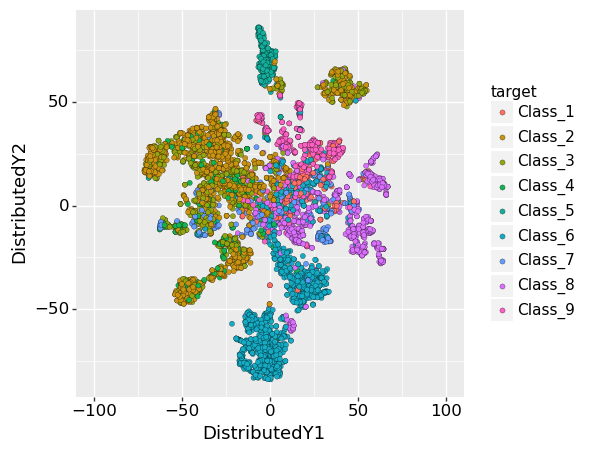

<ggplot: (182368925811)>


In [4]:
base_plot2 = (ggplot(df, aes('DistributedY1', 'DistributedY2', fill='target')) +
              geom_point(alpha=1, size=2, shape='o', colour='k', stroke=0.1) +
              # 绘制透明度为0.2 的散点图
              # stat_ellipse( geom="polygon", level=0.95, alpha=0.2) +
              # 绘制椭圆标定不同类别，如果省略该语句，则绘制图3-1-7(c)
              # scale_color_manual(values=("#00AFBB","#FC4E07")) +#使用不同颜色标定不同数据类别
              # scale_fill_cmap(name ='Set1')+
              scale_fill_hue(s=0.99, l=0.65, h=0.0417, color_space='husl') +
              xlim(-100, 100) +
              theme(
    # text=element_text(size=15,face="plain",color="black"),
    axis_title=element_text(size=13, face="plain", color="black"),
    axis_text=element_text(size=12, face="plain", color="black"),
    legend_text=element_text(size=11, face="plain", color="black"),
    aspect_ratio=1,
    figure_size=(5, 5),
    dpi=100
)
)
print(base_plot2)
